In [1]:
import os
import numpy as np
from utils.read_data import get_true_drift_positions
from utils.read_data import convert_date_back
import math

In [2]:
PATH_TRAJ = '../data/NOAA/trajectories'

np.random.seed(seed = 42)

files = [f for f in os.listdir(PATH_TRAJ)]

train_files = np.random.choice(files, 800)
val_files = np.random.choice(files, 200)
test_files = np.random.choice(files, 100)


In [3]:
np.random.seed(seed = 0)

PATH_TRAJ = '../data/NOAA/trajectories'
files = [f for f in os.listdir(PATH_TRAJ)]
train_files = []
test_files = []
val_files = []

i = 0
while len(train_files)<800:
    i = i + 1
    file = np.random.choice(files,1)
    file = file[0]
    data_file = os.path.join(PATH_TRAJ, file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, hours = get_true_drift_positions(data_file, NOAA=True)

    # check if date is fine
    min_time = min(hours) - 1
    min_date = convert_date_back(min_time)
    if min_date.year < 1995:
        #print('Year not ok: ', min_date.year)
        continue

    # check geographical areas 
    lat_max = math.ceil(max(lat)+1)
    lat_min = math.floor(min(lat)-1)
    lon_max = math.ceil(max(lon)+1)
    lon_min = math.floor(min(lon)-1)

    if not (((lat_max >= 0 and lat_max <= 90) and (lat_min >= 0 and lat_min <= 90)) or ((lat_max >= -90 and lat_max <= 0) and (lat_min >= -90 and lat_min <= 0))):
        #print('Lats not ok: min max lats:', lat_max, lat_min)
        continue

    if not (((lon_max >= -180 and lon_max <= -60) and (lon_min >= -180 and lon_min <= -60)) or ((lon_max >= -60 and lon_max <= 60) and (lon_min >= -60 and lon_min <= 60)) or ((lon_max >= 60 and lon_max <= 180) and (lon_min >= 60 and lon_min <= 180))):
        #print('Lons not ok: min max lons:', lon_max, lon_min)
        continue

    train_files.append(file)

    
print('Total training files tested:', i)

###########################################################################################################

i = 0
while len(test_files)<100:
    i = i + 1
    file = np.random.choice(files,1)
    file = file[0]
    data_file = os.path.join(PATH_TRAJ, file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, hours = get_true_drift_positions(data_file, NOAA=True)

    # check if date is fine
    min_time = min(hours) - 1
    min_date = convert_date_back(min_time)
    if min_date.year < 1995:
        #print('Year not ok: ', min_date.year)
        continue

    # check geographical areas 
    lat_max = math.ceil(max(lat)+1)
    lat_min = math.floor(min(lat)-1)
    lon_max = math.ceil(max(lon)+1)
    lon_min = math.floor(min(lon)-1)

    if not (((lat_max >= 0 and lat_max <= 90) and (lat_min >= 0 and lat_min <= 90)) or ((lat_max >= -90 and lat_max <= 0) and (lat_min >= -90 and lat_min <= 0))):
        #print('Lats not ok: min max lats:', lat_max, lat_min)
        continue

    if not (((lon_max >= -180 and lon_max <= -60) and (lon_min >= -180 and lon_min <= -60)) or ((lon_max >= -60 and lon_max <= 60) and (lon_min >= -60 and lon_min <= 60)) or ((lon_max >= 60 and lon_max <= 180) and (lon_min >= 60 and lon_min <= 180))):
        #print('Lons not ok: min max lons:', lon_max, lon_min)
        continue

    test_files.append(file)

    
print('Total testing files tested:', i)

###############################################################################################################

i = 0
while len(val_files)<200:
    i = i + 1
    file = np.random.choice(files,1)
    file = file[0]
    data_file = os.path.join(PATH_TRAJ, file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, hours = get_true_drift_positions(data_file, NOAA=True)

    # check if date is fine
    min_time = min(hours) - 1
    min_date = convert_date_back(min_time)
    if min_date.year < 1995:
        #print('Year not ok: ', min_date.year)
        continue

    # check geographical areas 
    lat_max = math.ceil(max(lat)+1)
    lat_min = math.floor(min(lat)-1)
    lon_max = math.ceil(max(lon)+1)
    lon_min = math.floor(min(lon)-1)

    if not (((lat_max >= 0 and lat_max <= 90) and (lat_min >= 0 and lat_min <= 90)) or ((lat_max >= -90 and lat_max <= 0) and (lat_min >= -90 and lat_min <= 0))):
        #print('Lats not ok: min max lats:', lat_max, lat_min)
        continue

    if not (((lon_max >= -180 and lon_max <= -60) and (lon_min >= -180 and lon_min <= -60)) or ((lon_max >= -60 and lon_max <= 60) and (lon_min >= -60 and lon_min <= 60)) or ((lon_max >= 60 and lon_max <= 180) and (lon_min >= 60 and lon_min <= 180))):
        #print('Lons not ok: min max lons:', lon_max, lon_min)
        continue

    val_files.append(file)

    
print('Total validation files tested:', i)

Total training files tested: 862
Total testing files tested: 115
Total validation files tested: 221


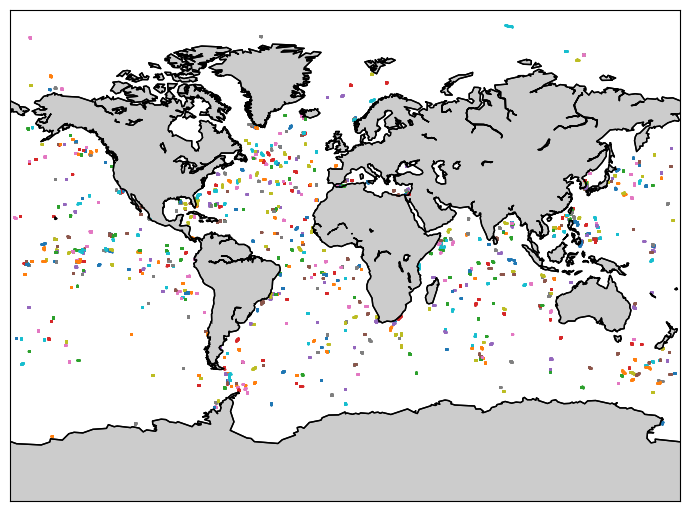

In [11]:
import os
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from utils.read_data import get_true_drift_positions

# setting the size of the map
fig = plt.figure(figsize=(7,5.5))

#plt.title('Training Dataset')

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
# m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# Open one of the files,
for data_file in train_files:
    data_file = os.path.join(PATH_TRAJ, data_file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, _ = get_true_drift_positions(data_file, NOAA=True)

    # plotting the map
    
    try:
        #m.plot(lon,lat,latlon=True,linewidth=1.5)
        m.scatter(lon, lat, latlon = True, s = 1, marker = '.', alpha = 1)
    except:
        pass
plt.tight_layout()
plt.savefig('figures/training_NOAA.png')
plt.show()

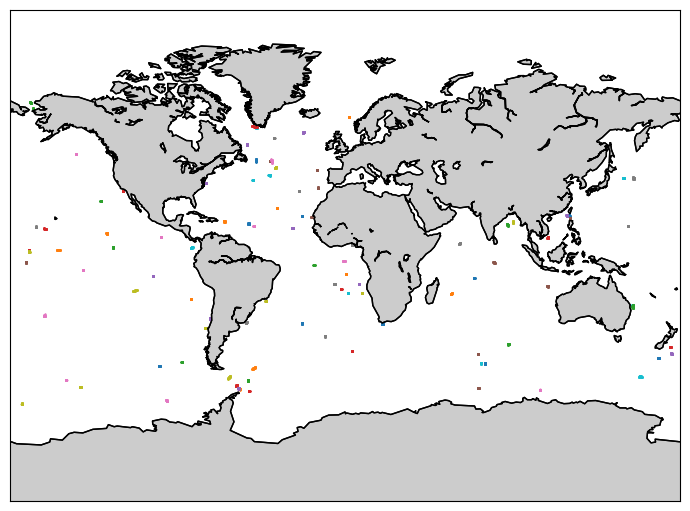

In [12]:
import os
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from utils.read_data import get_true_drift_positions

# setting the size of the map
fig = plt.figure(figsize=(7,5.5))

#plt.title('Testing Dataset')

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
# m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# Open one of the files,
for data_file in test_files:
    data_file = os.path.join(PATH_TRAJ, data_file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, _ = get_true_drift_positions(data_file, NOAA=True)

    # plotting the map
    
    try:
        #m.plot(lon,lat,latlon=True,linewidth=1.5)
        m.scatter(lon, lat, latlon = True, s = 1, marker = '.', alpha = 1)
    except:
        pass
plt.tight_layout()
plt.savefig('figures/testing_NOAA.png')
plt.show()

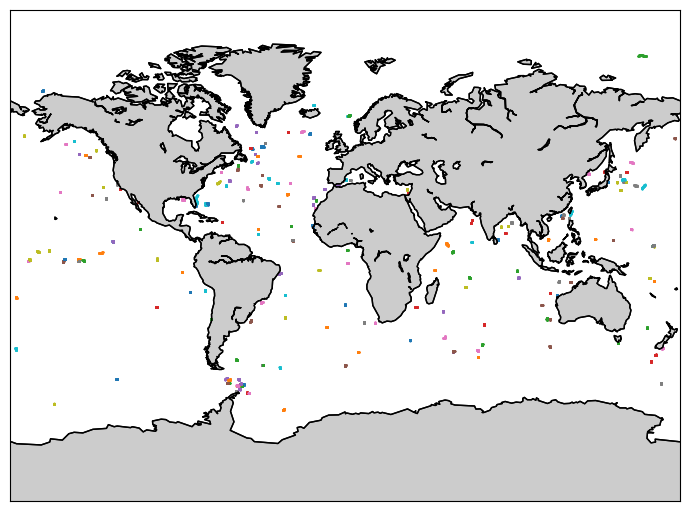

In [14]:
import os
import pandas as pd
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from utils.read_data import get_true_drift_positions

# setting the size of the map
fig = plt.figure(figsize=(7,5.5))

#plt.title('Validation Dataset')

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
# m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# Open one of the files,
for data_file in val_files:
    data_file = os.path.join(PATH_TRAJ, data_file)
    #drift_tab = pd.read_csv(data_file)

    lon, lat, _ = get_true_drift_positions(data_file, NOAA=True)

    # plotting the map
    
    try:
        #m.plot(lon,lat,latlon=True,linewidth=1.5)
        m.scatter(lon, lat, latlon = True, s = 1, marker = '.', alpha = 1)
    except:
        pass
plt.tight_layout()
plt.savefig('figures/validation_NOAA.png')
plt.show()

In [7]:
import pickle

with open("../data/NOAA/training_files_1000.pkl", "wb") as fp:   #Pickling
    pickle.dump(list(train_files), fp)
with open("../data/NOAA/testing_files_1000.pkl", "wb") as fp:   #Pickling
    pickle.dump(list(test_files), fp)
with open("../data/NOAA/validation_files_1000.pkl", "wb") as fp:   #Pickling
    pickle.dump(list(val_files), fp)